<a href="https://colab.research.google.com/github/bharathbolla/EVA5/blob/S9/EVA5_session9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/S9_Assignment/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA5/S9_Assignment


##IMPORTING


In [2]:
!nvidia-smi

Sat Sep 26 19:33:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from GradCam.gradcam_visualize import GradCAMView
import loader9
import model9
import train9
import test9

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


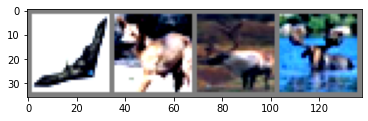

In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader9.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model9.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [6]:
model =  model9.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0) 

loss_func=nn.CrossEntropyLoss()
 
for epoch in range(25):
    print("Epoch:", epoch)
    train9.train(model, device, loader9.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test9.test(model, device, loader9.test_loader,loss_func,last_epoch=True)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 0


Epoch= 0 Loss=0.6748548746109009 Batch_id=781 Accuracy=48.60: 100%|██████████| 782/782 [01:03<00:00, 12.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 5927/10000 (59.27%)

Epoch: 1


Epoch= 1 Loss=0.5860982537269592 Batch_id=781 Accuracy=67.85: 100%|██████████| 782/782 [01:04<00:00, 12.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 7250/10000 (72.50%)

Epoch: 2


Epoch= 2 Loss=0.6892649531364441 Batch_id=781 Accuracy=74.93: 100%|██████████| 782/782 [01:06<00:00, 11.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 7766/10000 (77.66%)

Epoch: 3


Epoch= 3 Loss=0.2865361273288727 Batch_id=781 Accuracy=78.77: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 7953/10000 (79.53%)

Epoch: 4


Epoch= 4 Loss=0.897734522819519 Batch_id=781 Accuracy=82.22: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8154/10000 (81.54%)

Epoch: 5


Epoch= 5 Loss=1.1774297952651978 Batch_id=781 Accuracy=84.00: 100%|██████████| 782/782 [01:07<00:00, 11.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8210/10000 (82.10%)

Epoch: 6


Epoch= 6 Loss=0.4351736605167389 Batch_id=781 Accuracy=85.51: 100%|██████████| 782/782 [01:07<00:00, 11.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8462/10000 (84.62%)

Epoch: 7


Epoch= 7 Loss=0.9348620772361755 Batch_id=781 Accuracy=87.27: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 8100/10000 (81.00%)

Epoch: 8


Epoch= 8 Loss=0.5967283844947815 Batch_id=781 Accuracy=88.36: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8512/10000 (85.12%)

Epoch: 9


Epoch= 9 Loss=0.3982563614845276 Batch_id=781 Accuracy=89.58: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8363/10000 (83.63%)

Epoch: 10


Epoch= 10 Loss=0.9496886134147644 Batch_id=781 Accuracy=90.59: 100%|██████████| 782/782 [01:07<00:00, 11.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 8379/10000 (83.79%)

Epoch: 11


Epoch= 11 Loss=0.27095210552215576 Batch_id=781 Accuracy=91.28: 100%|██████████| 782/782 [01:07<00:00, 11.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8655/10000 (86.55%)

Epoch: 12


Epoch= 12 Loss=0.17554731667041779 Batch_id=781 Accuracy=91.93: 100%|██████████| 782/782 [01:07<00:00, 11.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8631/10000 (86.31%)

Epoch: 13


Epoch= 13 Loss=0.22016441822052002 Batch_id=781 Accuracy=92.69: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8643/10000 (86.43%)

Epoch: 14


Epoch= 14 Loss=0.5241596698760986 Batch_id=781 Accuracy=93.34: 100%|██████████| 782/782 [01:07<00:00, 11.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8661/10000 (86.61%)

Epoch: 15


Epoch= 15 Loss=0.4578455686569214 Batch_id=781 Accuracy=93.81: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8615/10000 (86.15%)

Epoch: 16


Epoch= 16 Loss=0.16562779247760773 Batch_id=781 Accuracy=94.20: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8698/10000 (86.98%)

Epoch: 17


Epoch= 17 Loss=0.11475501209497452 Batch_id=781 Accuracy=94.58: 100%|██████████| 782/782 [01:07<00:00, 11.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8781/10000 (87.81%)

Epoch: 18


Epoch= 18 Loss=0.12259923666715622 Batch_id=781 Accuracy=94.98: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8638/10000 (86.38%)

Epoch: 19


Epoch= 19 Loss=0.1980416178703308 Batch_id=781 Accuracy=95.46: 100%|██████████| 782/782 [01:07<00:00, 11.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8759/10000 (87.59%)

Epoch: 20


Epoch= 20 Loss=0.3585962951183319 Batch_id=781 Accuracy=95.76: 100%|██████████| 782/782 [01:07<00:00, 11.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8681/10000 (86.81%)

Epoch: 21


Epoch= 21 Loss=0.2329695075750351 Batch_id=781 Accuracy=95.87: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8766/10000 (87.66%)

Epoch: 22


Epoch= 22 Loss=0.2516036629676819 Batch_id=781 Accuracy=96.10: 100%|██████████| 782/782 [01:07<00:00, 11.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8829/10000 (88.29%)

Epoch: 23


Epoch= 23 Loss=0.5493054389953613 Batch_id=781 Accuracy=96.35: 100%|██████████| 782/782 [01:07<00:00, 11.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8781/10000 (87.81%)

Epoch: 24


Epoch= 24 Loss=0.2817092835903168 Batch_id=781 Accuracy=96.40: 100%|██████████| 782/782 [01:07<00:00, 11.62it/s]



Test set: Average loss: 0.0079, Accuracy: 8751/10000 (87.51%)



Text(0.5, 1.0, 'Test Accuracy')

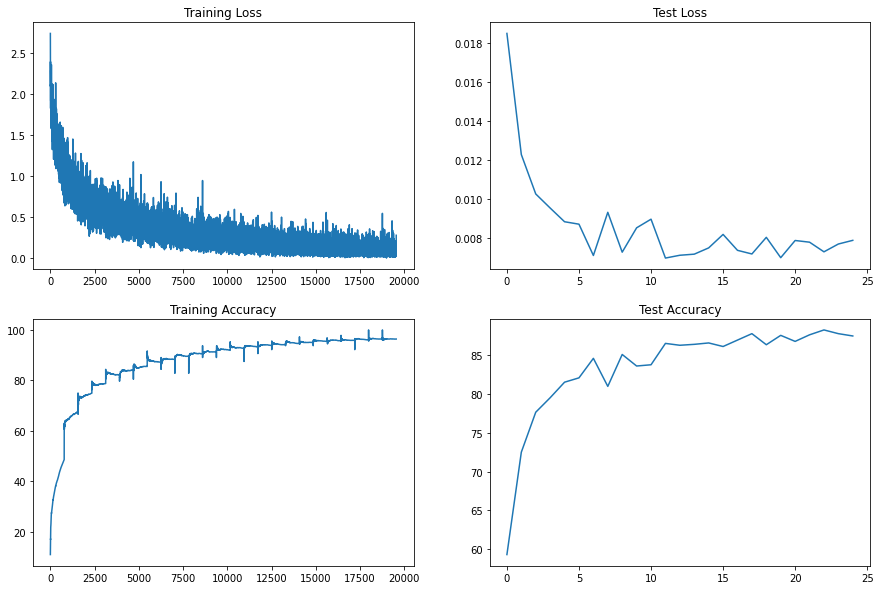

In [7]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train9.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train9.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test9.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test9.test_acc)
axs[1, 1].set_title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   frog  frog   car  deer


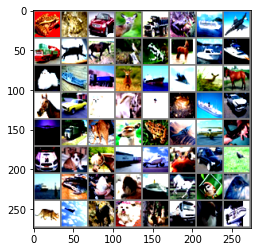

In [ ]:
dataiter = iter(loader9.test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog  frog   car  deer


In [ ]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader9.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 51.00it/s]

Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 89 %
Accuracy of   cat : 78 %
Accuracy of  deer : 82 %
Accuracy of   dog : 75 %
Accuracy of  frog : 91 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 94 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


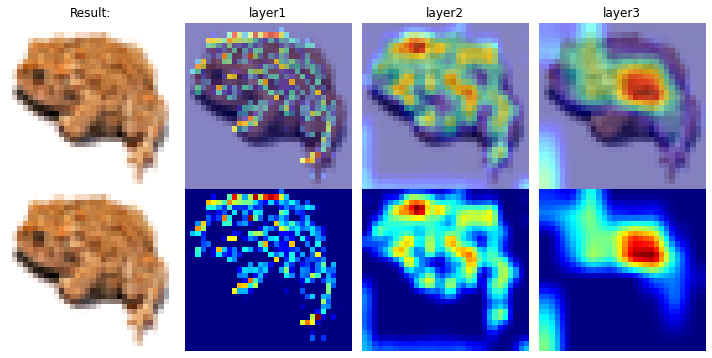

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

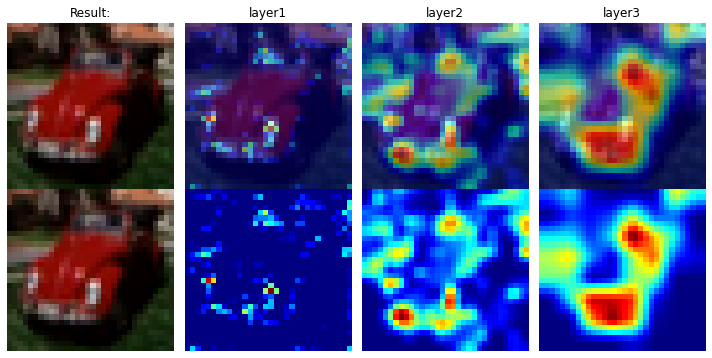

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

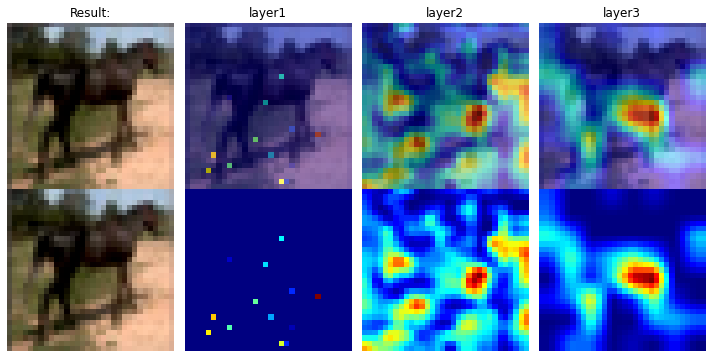

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

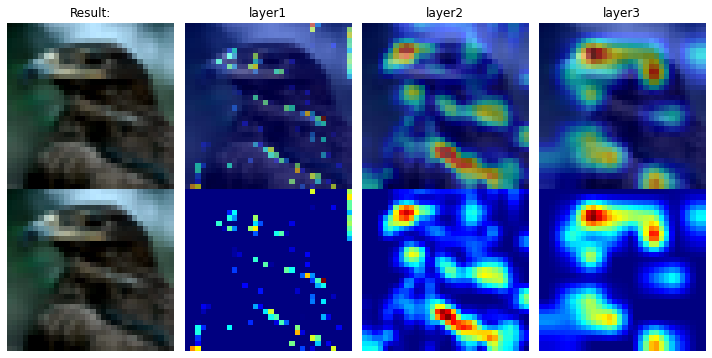

<Figure size 432x288 with 0 Axes>

In [ ]:
layers = ['layer1', 'layer2', 'layer3']
grad_cam = GradCAMView(model, layers, device, loader9.mean, loader9.std)
images = [x['image'] for x in random.sample(test9.correct_pred, 4)]
grad_cam(images, "grad_cam")